# Predicting The Rent of an Appartment in Manhattan, NY

This project uses the Street Easy New York Real Estate dataset.
The goal is to determine which factors predict rent prices in the borough of Manhattan.
To model these variables a Multiple Linear Regression Model was used.

### Phase 1: Modeling the Data

Performing imports

In [95]:
import pandas as pd
import scipy
from sklearn import linear_model
from sklearn import model_selection
from matplotlib import pyplot as plt

Loading and displaying the dataset

In [36]:
ny_data = pd.read_csv('https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/manhattan.csv')
ny_data.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


Let's try to understand how many records we have in our database

In [4]:
ny_data.shape

(3539, 18)

We have 3539 records modeled by 18 variables.
Let's select the variables that make sense in our linear regression model.
The Independent Variables will be stored in the X_Values, our target/dependent variable is stored in y_target.

In [102]:
X_Values = ny_data[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
                   'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 
                   'has_doorman','has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

In [46]:
y_target = ny_data['rent']

Split the data into training and testing set using 80/20 split.

In [103]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_Values, y_target, 
                                                    test_size=0.20, random_state=6)

Building the linear model with the help of sklearn

In [104]:
test_model = linear_model.LinearRegression()
test_model.fit(X_train, y_train)
y_predicted = test_model.predict(X_test)

Coefficients of the linear model:

In [105]:
test_model.coef_

array([-302.73009383, 1199.3859951 ,    4.79976742,  -24.28993151,
         24.19824177,   -7.58272473, -140.90664773,   48.85017415,
        191.4257324 , -151.11453388,   89.408889  ,  -57.89714551,
        -19.31948556,  -38.92369828])

Looking at the coefficients, we can see that the **number of bathrooms** and the **number of bedrooms** are the strongest predictors of Rent Price.
The Size of the Apartment seems to be the variable with least impact on Rent Price.
We can plot these values to analyze their relationships with rent price:

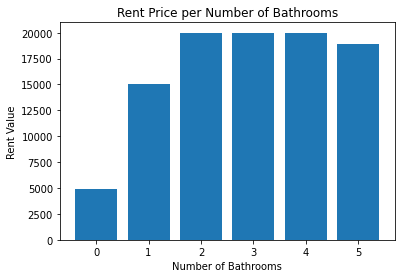

In [82]:
plt.bar(ny_data['bathrooms'], ny_data['rent'])
plt.title('Rent Price per Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Rent Value')
plt.show()

Text(0, 0.5, 'Rent Value')

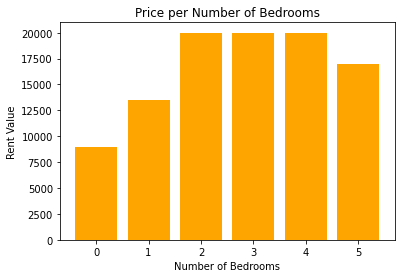

In [87]:
plt.bar(list(map(int, ny_data['bedrooms'])), ny_data['rent'], color='orange')
plt.title('Price per Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Rent Value')

## Phase 2: Model Evaluation

To evaluate the model, we compare the values predicted by the model with the actual data.
The following graph will compare the predictions with the target.

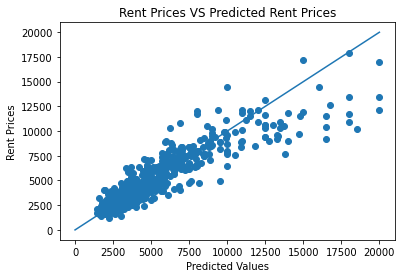

In [78]:
plt.scatter(y_test, y_predicted)
plt.title('Rent Prices VS Predicted Rent Prices')
plt.ylabel('Rent Prices')
plt.xlabel('Predicted Values')
plt.plot(range(20000), range(20000))
plt.show()

To get a more acurate representation of model's performance, we can compute the Error (R Score).

In [92]:
test_model.score(X_train, y_train)

0.7725460559817883

Or check the correlation between actual and predicted values

In [97]:
scipy.stats.pearsonr(y_test, y_predicted)[0]

0.8998544402074039

Since we have both a small error and a strong correlation between the data values and predicted values, we can assume this model is a good fit for our data.
We could also improve the model by removing the variable 'min_to_subway' from X_values, since it has a small coefficient in the linear regression performed above.